In [3]:
import numpy as np 
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import load_diabetes

In [4]:
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [6]:
print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (614, 8)
Shape of Test Features: (154, 8)
Shape of Train Target: (614,)
Shape of Test Target: (154,)


In [7]:
params = {"alpha":np.arange(0.00001, 10, 500)}
kf=KFold(n_splits=5,shuffle=True, random_state=42)
lasso = Lasso()
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)

,estimator,Lasso()
,param_grid,{'alpha': array([1.e-05])}
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.float64(1e-05)


In [8]:
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': np.float64(1e-05)}


In [9]:
names=df.drop("Outcome", axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [10]:
lasso1 = Lasso(alpha=0.00001)

In [11]:
lasso1.fit(X_train, y_train)

,alpha,1e-05
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [12]:
lasso1.coef_

array([ 0.01872885,  0.00621878, -0.00173984,  0.00077578, -0.00019259,
        0.01346101,  0.13161888,  0.00250611])

In [13]:
# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

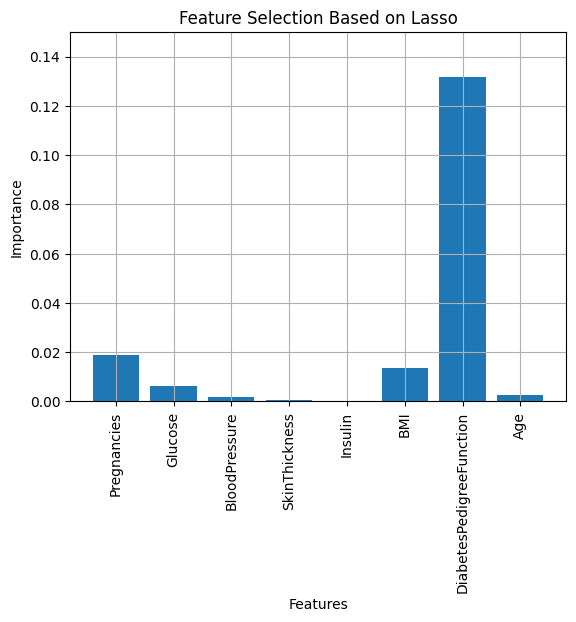

In [14]:
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [15]:
feature_subset=np.array(names)[lasso1_coef>0.001]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures. 
feature_subset=np.append(feature_subset, "Outcome")
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['Pregnancies' 'Glucose' 'BloodPressure' 'BMI' 'DiabetesPedigreeFunction'
 'Age']
Selected Columns: ['Pregnancies' 'Glucose' 'BloodPressure' 'BMI' 'DiabetesPedigreeFunction'
 'Age' 'Outcome']


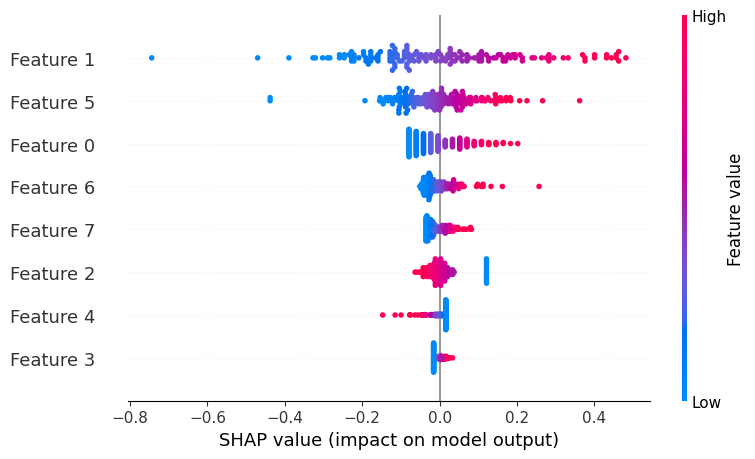

In [20]:
explainer = shap.Explainer(lasso1, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)